In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stats
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import joblib

warnings.filterwarnings('ignore')
%matplotlib inline

# Data Importing

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['species'].value_counts()  ## Balanced dataset

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Feature Visualisation

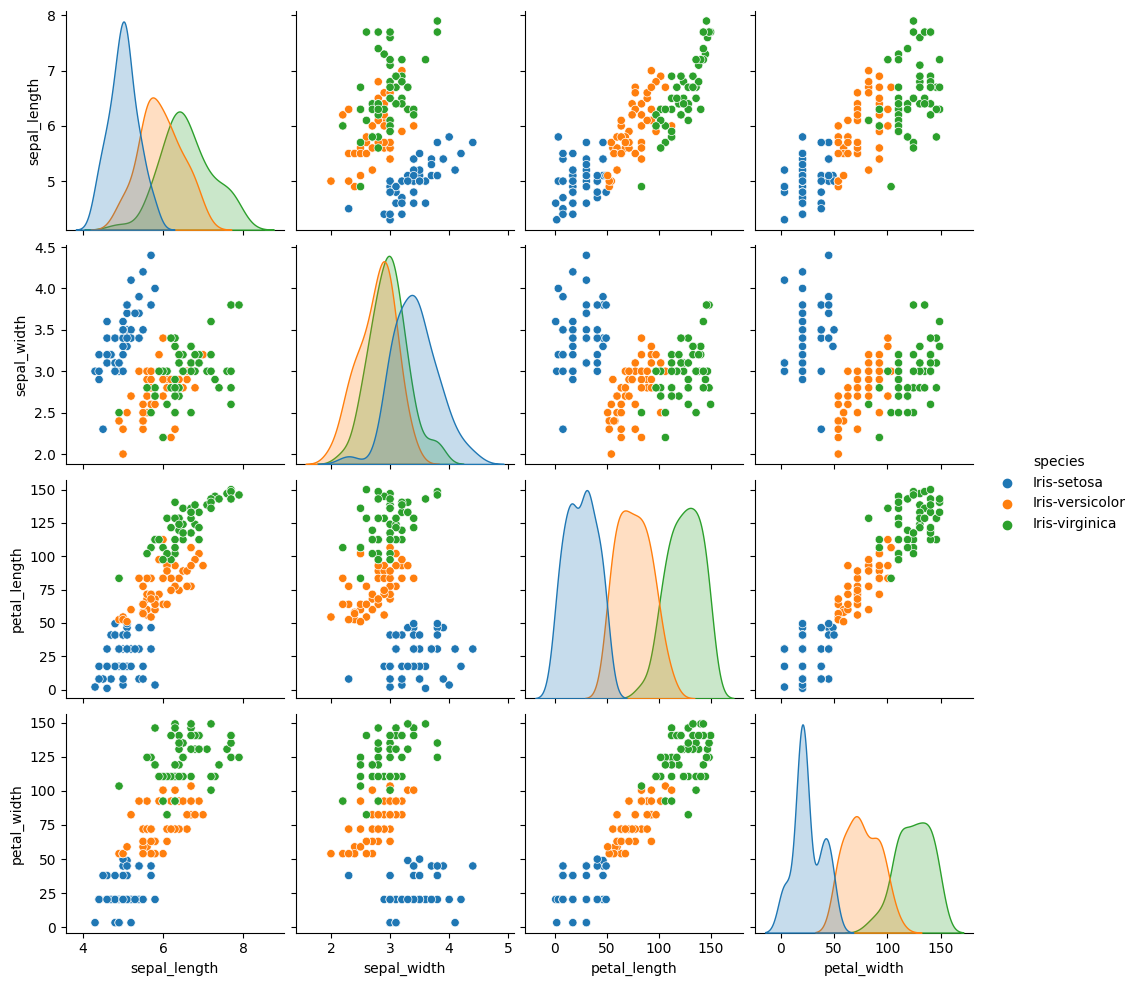

In [72]:
sns.pairplot(data=df,hue='species')

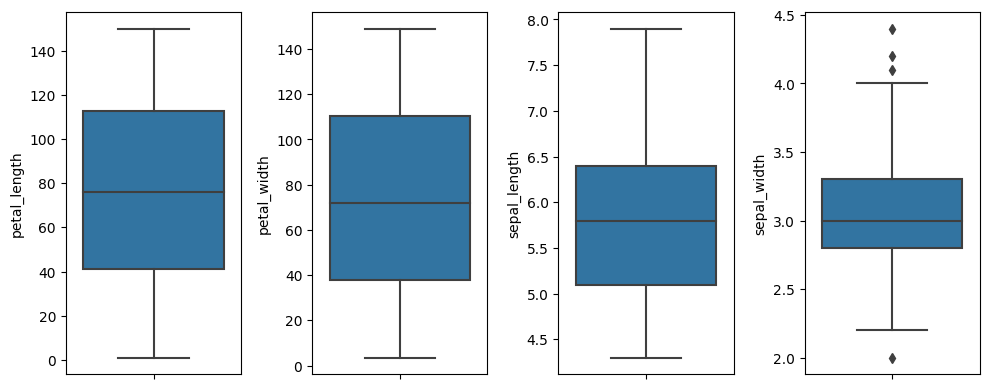

In [90]:
# Create the boxplot
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
sns.boxplot(data=df,y="petal_length",hue="species")

plt.subplot(1,4,2)
sns.boxplot(data=df,y="petal_width",hue="species")

plt.subplot(1,4,3)
sns.boxplot(data=df,y="sepal_length",hue="species")

plt.subplot(1,4,4)
sns.boxplot(data=df,y="sepal_width",hue="species")

plt.tight_layout()
plt.show()

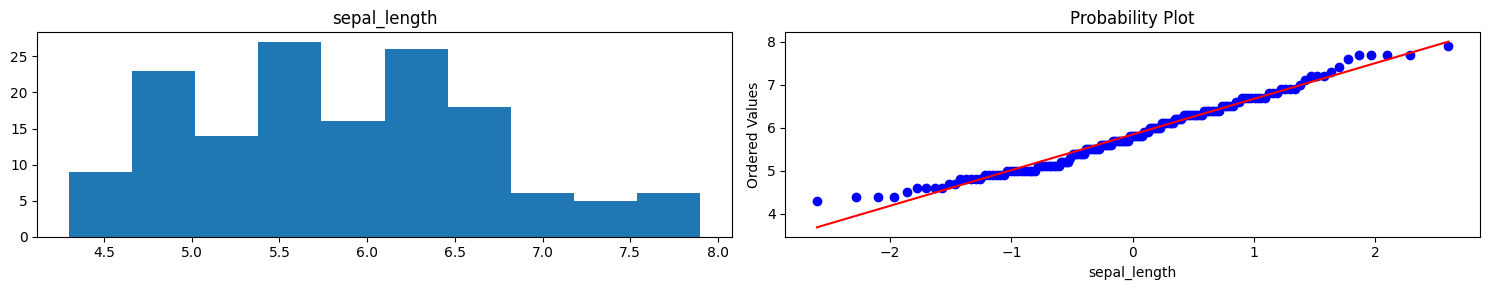

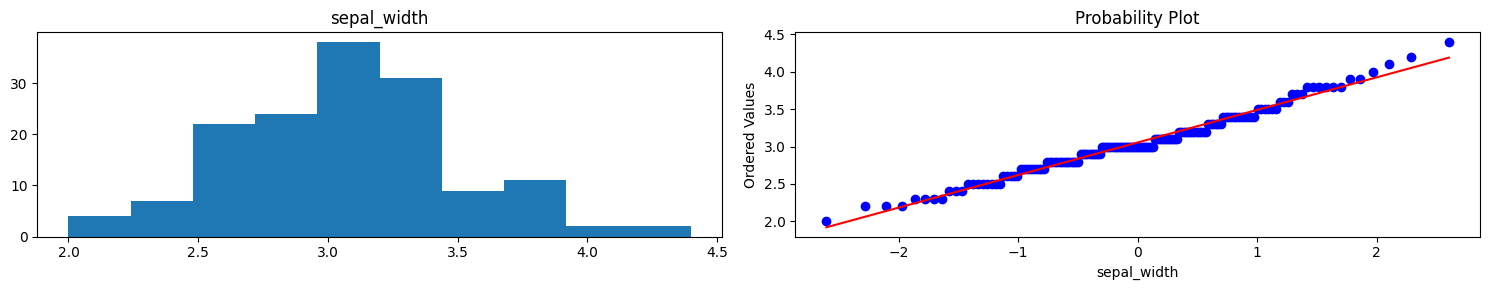

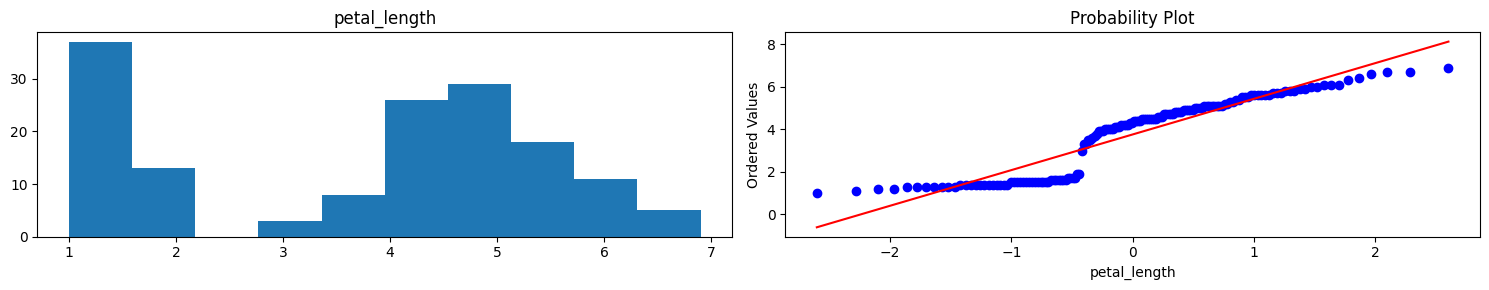

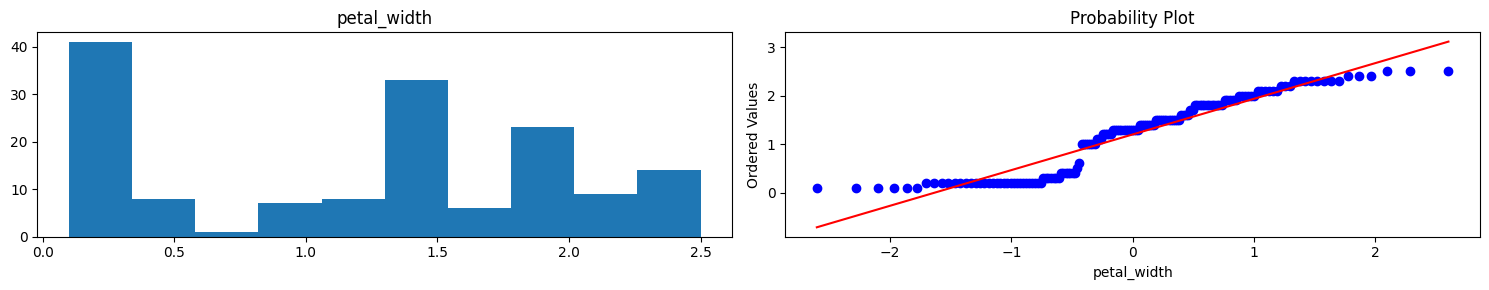

In [39]:
for i in df.columns[:-1]:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(121)
    ax1.hist(df[i],label=i,)
    plt.title(i)
    
    ax2 = plt.subplot(122)
    stats.probplot(df[i], dist="norm", plot=pylab)
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()


<Axes: >

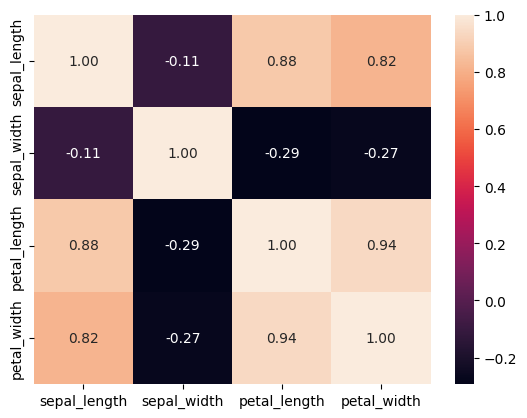

In [68]:
sns.heatmap(df.drop('species',axis=1).corr(),fmt='.2f',annot=True)

#### So we can see that petal_length and sepal_length have correlation value=0.88 and also petal_length and petal_width have corrleation as 0.94, So we will drop petal_length column 

In [3]:
df.drop('petal_length',axis=1,inplace=True)

# Feature Transformation :- 

#### **So we have to do transformation for petal_width column**

In [12]:
print("Normality tests before transformation:")
try:
    for col in df.columns:
        print(f"{col}: {stats.shapiro(df[col])}")
except Exception as e:
    pass

Normality tests before transformation:
sepal_length: ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)
sepal_width: ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)
petal_width: ShapiroResult(statistic=0.9026243686676025, pvalue=1.8646931110311016e-08)


## Transformations for Petal_width

In [4]:
# Box-Cox transformation
# Find optimal λ using boxcox function
df_d = df.copy()
lambda_, _ = stats.boxcox(df_d['petal_width'] + 1)  # Add 1 to avoid errors for 0 values
df_d['petal_width_boxcox'] = stats.boxcox(df_d['petal_width'] + 1, lambda_)

# Square root transformation
df_d['petal_width_sqrt'] = np.sqrt(df_d['petal_width'] + 1)

# Rank transformation
df_d['petal_width_rank'] = df_d['petal_width'].rank()

# Power transformation
df_d['petal_width_power'] = df_d['petal_width']**0.5

In [6]:
# print("\nNormality tests after log transformation:")
for col in ['petal_width_boxcox','petal_width_power','petal_width_rank','petal_width_sqrt']:
    print(f"{col}: {stats.shapiro(df_d[col])}")

petal_width_boxcox: ShapiroResult(statistic=0.8713575005531311, pvalue=4.2714867753979036e-10)
petal_width_power: ShapiroResult(statistic=0.8715339303016663, pvalue=4.3558689988287824e-10)
petal_width_rank: ShapiroResult(statistic=0.9392154216766357, pvalue=4.606143193086609e-06)
petal_width_sqrt: ShapiroResult(statistic=0.886777400970459, pvalue=2.532300369395557e-09)


## So we will select rank transformation for both petal length and petal width columns

In [4]:
df['petal_width'] = df['petal_width'].rank()


# Probplot after transformation

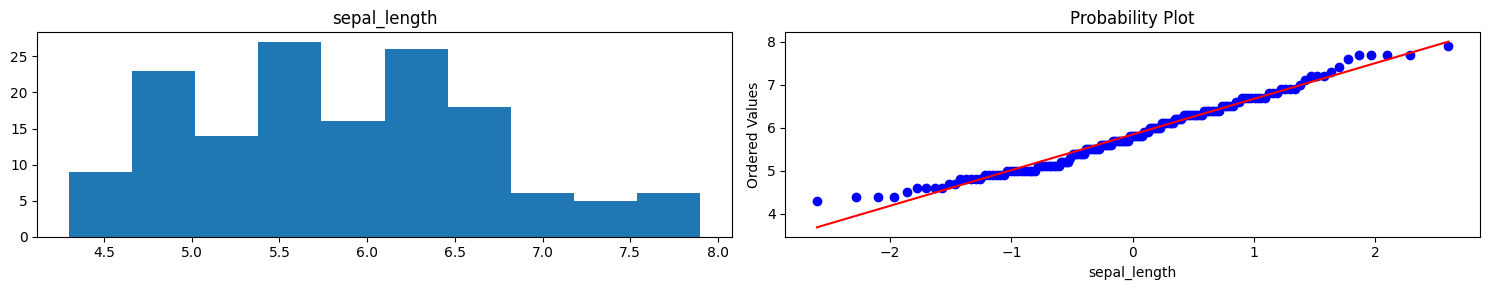

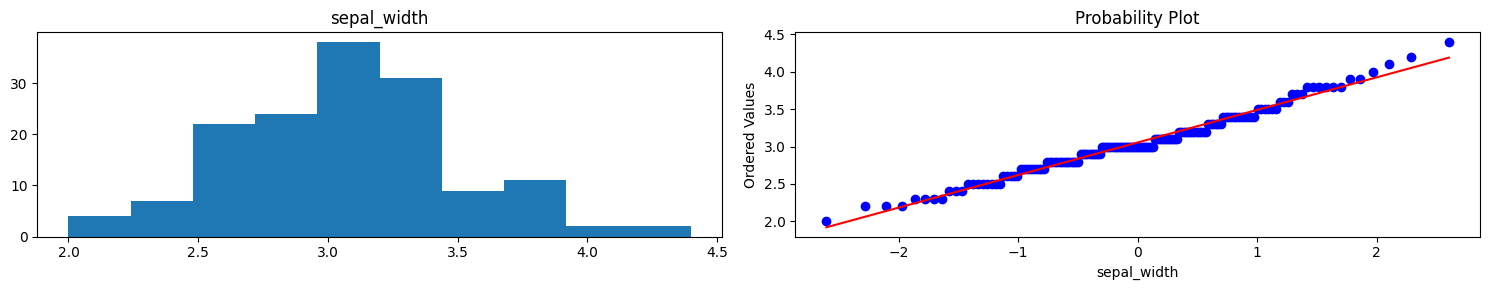

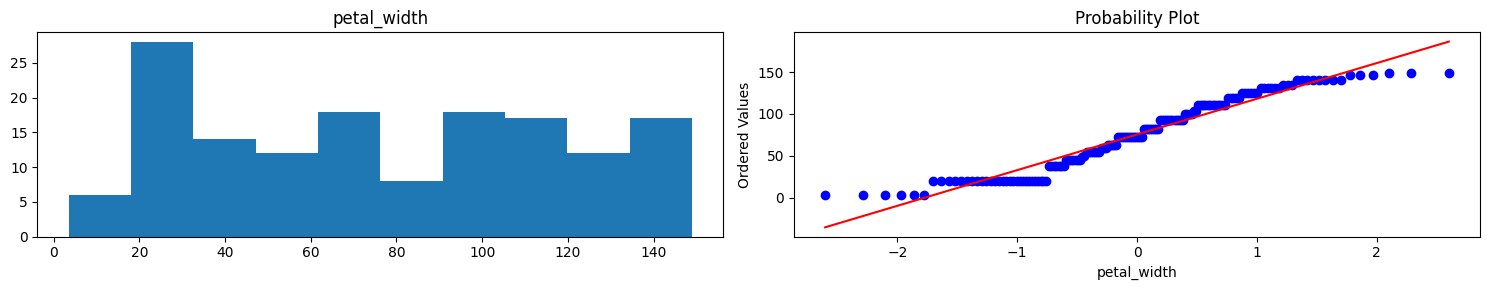

In [8]:
for i in df.columns[:-1]:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(121)
    ax1.hist(df[i],label=i,)
    plt.title(i)
    
    ax2 = plt.subplot(122)
    stats.probplot(df[i], dist="norm", plot=pylab)
    plt.xlabel(i)
    plt.tight_layout()
    plt.show()

# Standardization (mean 0, standard deviation 1):

In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_width', 'species'], dtype='object')

In [5]:
scaler = StandardScaler()

# Normalize the features
normalized_data = pd.DataFrame(scaler.fit_transform(df.drop('species',axis=1)), columns=df.columns[:-1])
normalized_data['species'] = df['species']

# Print the first few rows of the normalized data
normalized_data.head()


,sepal_length,sepal_width,petal_width,species
0,-0.900681,1.032057,-1.275994,Iris-setosa
1,-1.143017,-0.124958,-1.275994,Iris-setosa
2,-1.385353,0.337848,-1.275994,Iris-setosa
3,-1.506521,0.106445,-1.275994,Iris-setosa
4,-1.021849,1.263460,-1.275994,Iris-setosa


In [6]:
# Get the label encoder
label_encoder = LabelEncoder()

# Fit  and transform the label encoder on the "species" column
label_encoder.fit(normalized_data["species"])
normalized_data['species'] = label_encoder.transform(normalized_data["species"])

# # Encode the "species" column
# normalized_data["species_encoded"] = label_encoder.transform(data_copy["species"])

#  print the encoded values
print("Encoded values:", normalized_data["species"])



Encoded values: 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [21]:
normalized_data.head()

,sepal_length,sepal_width,petal_width,species
0,-0.900681,1.032057,-1.275994,0
1,-1.143017,-0.124958,-1.275994,0
2,-1.385353,0.337848,-1.275994,0
3,-1.506521,0.106445,-1.275994,0
4,-1.021849,1.263460,-1.275994,0


# Model Selection

In [7]:
# Split data into train and test sets
X,y = normalized_data.drop('species',axis=1), normalized_data['species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Define models to evaluate
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Print and compare results
print("Model Evaluation Results:\n")

pd.DataFrame(results).T

Model Evaluation Results:



,Accuracy,Precision,Recall,F1-Score
KNN,0.955556,0.961481,0.955556,0.955291
Decision Tree,0.977778,0.979365,0.977778,0.977745
Random Forest,0.933333,0.945833,0.933333,0.932434
SVM,1.000000,1.000000,1.000000,1.000000
Logistic Regression,0.977778,0.979365,0.977778,0.977745


# Hyper Parameter Tuning

In [8]:
# Define parameters to tune
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['auto', 0.001, 0.01, 0.1, 1,'scale'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Create the GridSearchCV object
svc = SVC()
clf = GridSearchCV(svc, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Train the model with hyperparameter tuning
clf.fit(X_train, y_train)

# Get the best model and parameters
best_model = clf.best_estimator_
best_params = clf.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best model parameters:", best_params)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)
print("Test F1-score:", f1)


Best model parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Test accuracy: 0.9777777777777777
Test precision: 0.9793650793650793
Test recall: 0.9777777777777777
Test F1-score: 0.9777448559670783


#### So now , as Hyper parameter tuned model is Estimated using Stratified K fold method , then It has better generalised train data , so We will select our hyper parameter tuned model as final model

In [31]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

# Exporting StandardScaler, LabelEncoder , Model files

In [10]:
# Save the trained model
joblib.dump(best_model, 'exported_model.pkl')

# Save the standard scaler
joblib.dump(scaler, 'exported_scaler.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'exported_labelencoder.pkl')

print("Model, scaler, and label encoder successfully exported!")


Model, scaler, and label encoder successfully exported!
